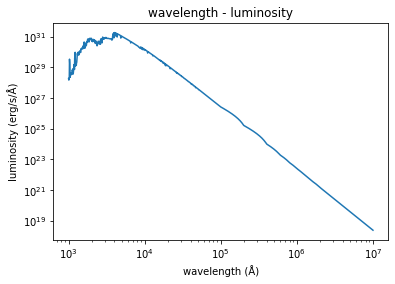

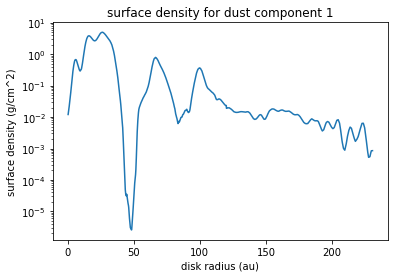

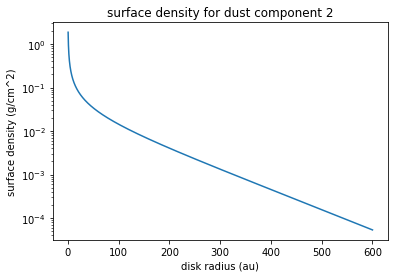

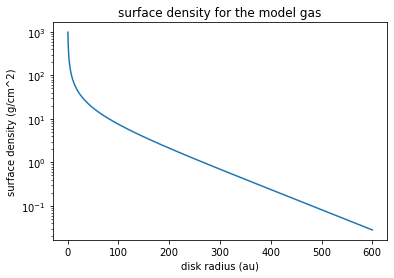

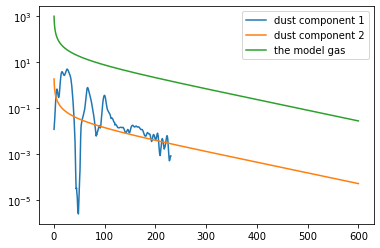

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy import units as u

filename1 = '/Users/mengfeilong/desktop/HD163296_spectra_modified_UV.txt'
data1 = np.loadtxt(filename1)
a = data1[:,0]
b = data1[:,1]
plt.loglog(a, b)
plt.xlabel(r'wavelength (Å)')
plt.ylabel(r'luminosity (erg/s/Å)')
plt.title(r'wavelength - luminosity')
plt.show()

filename2 = '/Users/mengfeilong/desktop/sigma_lgdust_HD163296.txt'
data2 = np.loadtxt(filename2)
r = data2[:,0]
z = data2[:,1]
plt.semilogy(r,z)
plt.title(r'surface density for dust component 1')
plt.xlabel(r'disk radius (au)')
plt.ylabel(r'surface density (g/cm^2)')
plt.show()

Md1 = 0.000266666666667 * u.solMass
Md1 = Md1.to(u.g)
gam1 = 0.8
rc1 = 165.0 * u.au
rc1 = rc1.to(u.cm)
sigma_c1 = ((2 - gam1) * Md1) / ((2 * math.pi) * rc1 ** 2)
x = np.linspace(0.45, 600, 10000) * u.au
rc1 = rc1.to(u.au)
sigma_gr1 = sigma_c1 * ((x / rc1) ** (-1 * gam1)) * np.exp((-1 * (x / rc1) ** (2 - gam1)))
line2 = plt.semilogy(x, sigma_gr1)
plt.title(r'surface density for dust component 2')
plt.xlabel(r'disk radius (au)')
plt.ylabel(r'surface density (g/cm^2)')
plt.show()

Md2 = 0.14 * u.solMass
Md2 = Md2.to(u.g)
gam2 = 0.8
rc2 = 165.0 * u.au
rc2 = rc2.to(u.cm)
sigma_c2 = ((2 - gam2) * Md2) / ((2 * math.pi) * rc2 ** 2)
x = np.linspace(0.45, 600, 10000) * u.au
rc2 = rc2.to(u.au)
sigma_gr2 = sigma_c2 * ((x / rc2) ** (-1 * gam2)) * np.exp((-1 * (x / rc2) ** (2 - gam2)))
line3 = plt.semilogy(x, sigma_gr2)
plt.title(r'surface density for the model gas')
plt.xlabel(r'disk radius (au)')
plt.ylabel(r'surface density (g/cm^2)')
plt.show()

fig, ax = plt.subplots()
ax.semilogy(r, z, label = 'dust component 1')
ax.semilogy(x, sigma_gr1, label = 'dust component 2')
ax.semilogy(x, sigma_gr2, label = 'the model gas')
leg = ax.legend(loc = 'best')

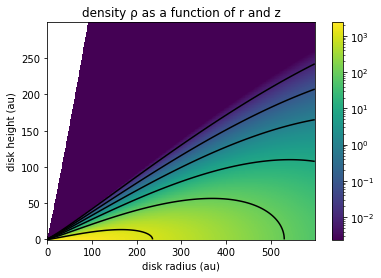

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy import units as u
import matplotlib.colors as colors

Md = 0.14
gam = 0.8
rc = 165.0
r_ref = 100.0
h_ref = 8.44
psi = 1.08
x = np.arange(0.45, 600.0)
y = np.arange(0, 300.0)
r, z = np.meshgrid(x, y)
sigma_c = ((2 - gam) * Md) / (2 * math.pi) * rc ** 2
sigma_gr = sigma_c * ((r / rc) ** (-1 * gam)) * np.exp((-1 * (r / rc) ** (2 - gam)))
Hr = h_ref * (r / r_ref) ** psi
P = (sigma_gr / ((2 * math.pi) ** (0.5)) * Hr) * np.exp(-0.5 * (z / Hr) ** 2)
fig, ax = plt.subplots()
plt.pcolor(r, z, P, norm = colors.LogNorm(vmin = P.max() * 10 ** -6, vmax = P.max()), shading = 'auto')
plt.colorbar()
plt.contour(P, [0.01, 0.1, 1, 10, 100, 1000], colors = 'black')
plt.title(r'density ρ as a function of r and z')
plt.xlabel(r'disk radius (au)')
plt.ylabel(r'disk height (au)')
plt.show()